In [1]:
#! pip install chembl-webresource-client
import pandas as pd
from chembl_webresource_client.new_client import new_client

### Coleta de dados de uma base de dados biológicos (usando a API do ChEMBL) para obter informações sobre a proteína-alvo acetylcholinesterase.

In [2]:
## A proteína de interesse é a acetilcolinesterase, uma proteína associada à doença de Alzheimer
target_protein = new_client.target
target_query = target_protein.search('acetylcholinesterase').filter(target_type='SINGLE PROTEIN').filter(organism='Homo sapiens')
data = pd.DataFrame.from_dict(target_query)
data

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606


In [3]:
## Queremos apenas a primeira proteína: acetilcolinesterase
chosen_one = data.iloc[0]['target_chembl_id']
target_activity = new_client.activity
target_query = target_activity.filter(target_chembl_id=chosen_one).filter(standard_type='IC50')
df = pd.DataFrame.from_dict(target_query)
df ## contém todos os compostos que foram testados nesta proteína.

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0
8830,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965330,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.18


In [4]:
## Eliminando todos os valores nulos. (perdeu 1283 observações)
df.dropna(subset=['standard_value'],inplace=True)

In [5]:
## Salvando em csv 
df.to_csv('./screened/acetylcholinesterase.csv', index=False)

In [6]:
data = pd.read_csv('./screened/acetylcholinesterase.csv')
data.shape

(7549, 46)

In [7]:
## Alterando os valores padrão para tipo de classe para modelo de tipo de classificação.
bioactivity_class =[]
for x in data.standard_value:
    if float(x) >= 10000:
        bioactivity_class.append('inactive')
    elif float(x) < 1000:
        bioactivity_class.append('active')
    else:
        bioactivity_class.append('min effect')

In [8]:
from collections import Counter
Counter(bioactivity_class)

Counter({'active': 3570, 'inactive': 2187, 'min effect': 1792})

In [9]:
## Há um desequilíbrio no conjunto de compostos ativos e inativos.
## Agora, criamos um DataFrame contendo apenas o chembl_id, standard_value, canonical_smiles e classe de bioatividade.
data['bioactivity_class'] = bioactivity_class
data2 = data[['bioactivity_class', 'molecule_chembl_id', 'canonical_smiles', 'standard_value']]
data2.reset_index(inplace=True)
data2

,index,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value
0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...,...,...
7544,7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0
7545,7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0
7546,7546,inactive,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0
7547,7547,min effect,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,1180.0


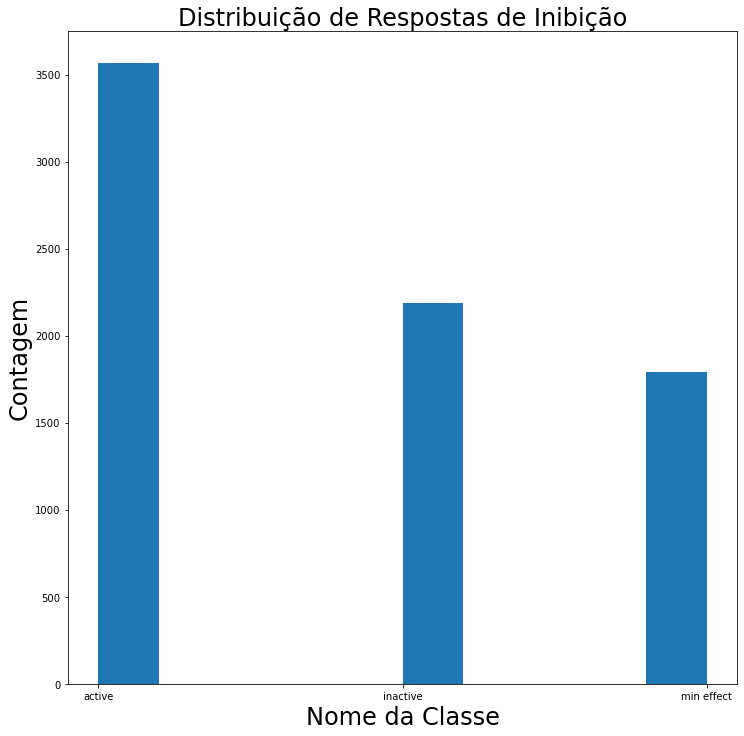

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.hist(data2['bioactivity_class'])
plt.xlabel('Nome da Classe', fontsize=24)
plt.ylabel('Contagem', fontsize=24)
plt.title('Distribuição de Respostas de Inibição', fontsize=24)
plt.savefig('./img/Distribuicao_Respostas_Inibicao.png')

## Análise Exploratória de Dados (EDA) usando Descritores de Lipinski

In [11]:
## Importa as bibliotecas necessárias
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors
import numpy as np

## Definição da função que calcula os descritores de Lipinski dos compostos
def mol_descriptors(molecules, verbose=False):
    
    molData = []
    for smi in molecules:
        try:
            mol = Chem.MolFromSmiles(smi)
            molData.append(mol)
        except: 
            print(smi)
    
    # Inicializa variáveis
    storage = np.arange(1,1)
    i=0
    
    # Loop para calcular os descritores de Lipinski para cada molécula
    for y in molData:
        MolWt = Descriptors.MolWt(y)  # Peso Molecular
        NumHDonors = Descriptors.NumHDonors(y)  # Número de Doadores de Hidrogênio
        NumHAccept = Descriptors.NumHAcceptors(y)  # Número de Aceitadores de Hidrogênio
        MolLogP = Descriptors.MolLogP(y)  # Coeficiente de Partição octanol-água
        
        insert = np.array([MolWt, NumHDonors, NumHAccept, MolLogP])
        
        if (i==0):
            LipinskiData = insert
        else:
            LipinskiData = np.vstack([LipinskiData, insert])
        i=+1
        
    # Nomes das colunas dos descritores
    column_names = ['Peso Molecular', 'Número de Doadores de Hidrogênio', 'Número de Aceitadores de Hidrogênio', 'OWPC']
    
    # Cria um DataFrame com os dados dos descritores de Lipinski
    Descritores_Lipinski = pd.DataFrame(LipinskiData, columns=column_names)
    
    return Descritores_Lipinski

In [12]:
# Chama a função mol_descriptors para calcular os descritores de Lipinski e armazena os resultados em df_lipinski
df_lipinski = mol_descriptors(data2.canonical_smiles)
df_lipinski

nan
nan


,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC
0,312.325,0.0,6.0,2.8032
1,376.913,0.0,5.0,4.5546
2,426.851,0.0,5.0,5.3574
3,404.845,0.0,5.0,4.7069
4,346.334,0.0,6.0,3.0953
...,...,...,...,...
7542,352.478,1.0,3.0,5.0610
7543,287.246,1.0,4.0,2.1994
7544,311.337,1.0,4.0,3.1837
7545,198.269,1.0,2.0,2.6958


In [13]:
# Salva os dados dos descritores de Lipinski em um arquivo CSV chamado 'df-lipinski.csv'
df_lipinski.to_csv('./screened/df-lipinski.csv', index=False)

# Combina os DataFrames 'data2' e 'df_lipinski' ao longo das colunas (axis=1)
df_full = pd.concat([data2, df_lipinski], axis=1)

# Remove a coluna 'index' do DataFrame 'df_full'
df_full.drop(columns=['index'], inplace=True)

# Cria uma nova coluna 'lit' no DataFrame 'df_full' contendo uma sequência de números começando de 1
df_full['lit'] = range(1, len(df_full) + 1)

# Salva os dados completos, incluindo os descritores de Lipinski e a nova coluna 'lit',
# em um arquivo CSV chamado 'Lipinski- complete dataset.csv'
df_full.to_csv('./screened/Lipinski- complete dataset.csv', index=False)
df_full

,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,lit
0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,312.325,0.0,6.0,2.8032,1
1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,376.913,0.0,5.0,4.5546,2
2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,426.851,0.0,5.0,5.3574,3
3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,404.845,0.0,5.0,4.7069,4
4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,346.334,0.0,6.0,3.0953,5
...,...,...,...,...,...,...,...,...,...
7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,311.337,1.0,4.0,3.1837,7545
7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,198.269,1.0,2.0,2.6958,7546
7546,inactive,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,398.466,0.0,5.0,3.7748,7547
7547,min effect,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,1180.0,NaN,NaN,NaN,NaN,7548


In [2]:
df_full = pd.read_csv("./screened/Lipinski- complete dataset.csv", delimiter= ",")

<AxesSubplot:>

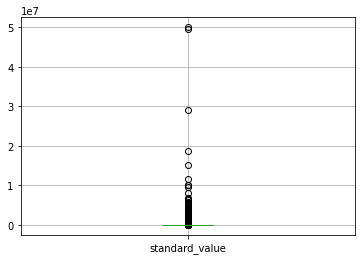

In [3]:
# Cria um gráfico de caixa (boxplot) para visualizar a distribuição dos valores da coluna 'standard_value'
df_full.boxplot(patch_artist=True, column=['standard_value'])

In [15]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7549 entries, 0 to 7548
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   bioactivity_class                    7549 non-null   object 
 1   molecule_chembl_id                   7549 non-null   object 
 2   canonical_smiles                     7547 non-null   object 
 3   standard_value                       7549 non-null   float64
 4   Peso Molecular                       7547 non-null   float64
 5   Número de Doadores de Hidrogênio     7547 non-null   float64
 6   Número de Aceitadores de Hidrogênio  7547 non-null   float64
 7   OWPC                                 7547 non-null   float64
 8   lit                                  7549 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 530.9+ KB


In [16]:
df_full['standard_value'].describe()

count    7.549000e+03
mean     9.956177e+04
std      1.020298e+06
min      0.000000e+00
25%      9.300000e+01
50%      1.300000e+03
75%      1.205000e+04
max      5.000000e+07
Name: standard_value, dtype: float64

In [17]:
# Exibe informações sobre o DataFrame df_full, como número de entradas, colunas e tipos de dados
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7549 entries, 0 to 7548
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   bioactivity_class                    7549 non-null   object 
 1   molecule_chembl_id                   7549 non-null   object 
 2   canonical_smiles                     7547 non-null   object 
 3   standard_value                       7549 non-null   float64
 4   Peso Molecular                       7547 non-null   float64
 5   Número de Doadores de Hidrogênio     7547 non-null   float64
 6   Número de Aceitadores de Hidrogênio  7547 non-null   float64
 7   OWPC                                 7547 non-null   float64
 8   lit                                  7549 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 530.9+ KB


In [18]:
# Gera um resumo estatístico da coluna 'standard_value', incluindo média, desvio padrão, mínimo, máximo e quartis
df_full['standard_value'].describe()

count    7.549000e+03
mean     9.956177e+04
std      1.020298e+06
min      0.000000e+00
25%      9.300000e+01
50%      1.300000e+03
75%      1.205000e+04
max      5.000000e+07
Name: standard_value, dtype: float64

In [4]:
## Definindo um limite para o valor padrão auxiliará na interpretação dos resultados do teste.
## Grandes valores de IC50 já são candidatos fracos para ensaios clínicos, portanto, limitar os valores de pIC50 em 10000000
## tornará nossos dados mais uniformes sem sacrificar a validade de nossas conclusões.

import math

# Função para padronizar e converter os valores de IC50 em valores pIC50
def standardize_and_conversion(dataset):
    store = []
    for x in dataset['standard_value']:
        try:
            ### Configurando o limite para o valor de IC50 em 10000000
            if x > 10000000:
                x = 10000000

            #### Convertendo o valor de IC50 em valores molares
            molar_value = x*(10**-9)
            if (0 >= molar_value):
                molar_value = 1

            insert = -math.log(molar_value,10)
            store.append(insert)
        except: 
            print(molar_value)
    return store

In [5]:
# Aplica a função aos dados de IC50 no DataFrame e armazena os resultados em Standard_value_norm
Standard_value_norm = standardize_and_conversion(df_full)

# Converte a lista de valores normalizados em uma série pandas
Standard_value_norm = pd.Series(Standard_value_norm)

# Exibe um resumo estatístico dos valores normalizados
Standard_value_norm.describe()

count    7549.000000
mean        5.988377
std         1.590897
min        -0.000000
25%         4.918000
50%         5.886057
75%         7.031517
max        14.301030
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f3fee64d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f3fee6c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f3fee60d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1f3fef2550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f3fef2990>],
 'means': []}

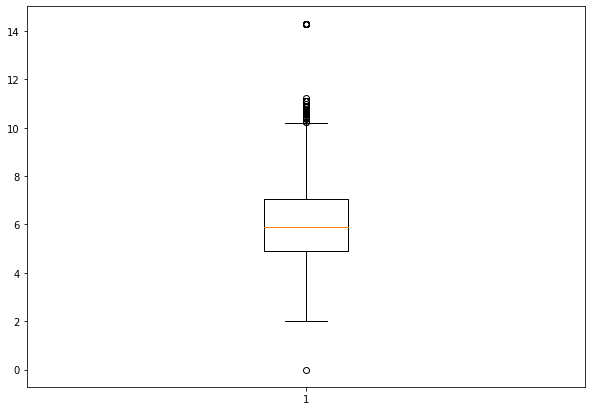

In [6]:
## Gráfico que mostra o efeito da conversão de valores molares no espaço de amostras.
## Configuração do tamanho da figura
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10, 7))

# Cria um gráfico de caixa para visualizar a distribuição dos valores normalizados de pIC50
plt.boxplot(Standard_value_norm)
#plt.savefig('valores pIC50(log1000)')

In [7]:
# Cria uma série pandas a partir dos valores normalizados para análise adicional
setting = pd.Series(Standard_value_norm)

# Exibe um resumo estatístico dos valores na série 'setting'
setting.describe()

count    7549.000000
mean        5.988377
std         1.590897
min        -0.000000
25%         4.918000
50%         5.886057
75%         7.031517
max        14.301030
dtype: float64

In [8]:
# Calcula o terceiro quartil (q3), primeiro quartil (q1) e intervalo interquartil (IQR)
q3 = setting.quantile(0.75)
q1 = setting.quantile(0.25)
iqr = 1.5*(q3 - q1) + q3

# Filtra os valores que estão acima do limite do intervalo interquartil (outliers)
setting.loc[setting > iqr]

1386    10.39794
1388    11.09691
1396    10.39794
1398    11.09691
1570    10.69897
          ...   
5985    14.30103
5986    14.30103
5987    14.30103
5988    14.30103
6088    11.09691
Length: 62, dtype: float64

In [9]:
## Dado que o subconjunto de outliers é pequeno (15), a remoção desses valores será a melhor opção, em vez de tentar
## ajustá-los ao modelo.

# Filtra os valores que estão dentro do intervalo interquartil (não são outliers) e armazena em 'insert_2'
insert_2 = setting[setting <= iqr]

# Atualiza a coluna 'pIC50' do DataFrame 'df_full' com os valores filtrados
df_full['pIC50'] = insert_2

# Conta a quantidade total de valores não nulos na coluna 'pIC50'
df_full.pIC50.notnull().sum()

# Conta a quantidade de valores no objeto 'insert_2'
insert_2.count()
df_full

,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,lit,pIC50
0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,312.325,0.0,6.0,2.8032,1,6.124939
1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,376.913,0.0,5.0,4.5546,2,7.000000
2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,426.851,0.0,5.0,5.3574,3,4.301030
3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,404.845,0.0,5.0,4.7069,4,6.522879
4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,346.334,0.0,6.0,3.0953,5,6.096910
...,...,...,...,...,...,...,...,...,...,...
7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,311.337,1.0,4.0,3.1837,7545,6.562249
7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,198.269,1.0,2.0,2.6958,7546,4.118045
7546,inactive,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,398.466,0.0,5.0,3.7748,7547,4.259637
7547,min effect,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,1180.0,NaN,NaN,NaN,NaN,7548,5.928118


In [10]:
# Exibe um resumo estatístico dos valores na coluna 'pIC50' do DataFrame df_full
df_full.pIC50.describe()

count    7487.000000
mean        5.938341
std         1.490486
min        -0.000000
25%         4.909390
50%         5.869666
75%         7.000000
max        10.187087
Name: pIC50, dtype: float64

<AxesSubplot:>

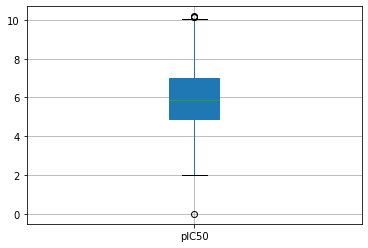

In [11]:
# Calcula o terceiro quartil (q3) dos valores na coluna 'pIC50' do DataFrame df_full
q3 = df_full['pIC50'].quantile(0.75)

# Calcula o primeiro quartil (q1) dos valores na coluna 'pIC50' do DataFrame df_full
q1 = df_full['pIC50'].quantile(0.25)

# Calcula o limite superior para identificação de outliers usando o intervalo interquartil (IQR)
iqr = 1.5 * (q3 - q1) + q3

# Filtra os valores na coluna 'pIC50' do DataFrame df_full que estão acima do limite superior (outliers)
df_full['pIC50'].loc[df_full['pIC50'] > iqr]

# Cria um gráfico de caixa (boxplot) para visualizar a distribuição dos valores na coluna 'pIC50' do DataFrame df_full
df_full.boxplot(patch_artist=True,column='pIC50') ## Todos os outliers foram removidos

In [12]:
## Remove as linhas que estão com valores ausentes na coluna 'pIC50'
df_full.dropna(inplace=True) ## O conjunto de dados agora não possui outliers na variável de resposta

## Remove a coluna 'standard_value' do DataFrame df_full
df_full.drop(columns='standard_value', inplace=True)

df_full

,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,lit,pIC50
0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,1,6.124939
1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,2,7.000000
2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,3,4.301030
3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,0.0,5.0,4.7069,4,6.522879
4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,0.0,6.0,3.0953,5,6.096910
...,...,...,...,...,...,...,...,...,...
7542,active,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,352.478,1.0,3.0,5.0610,7543,9.679854
7543,inactive,CHEMBL147527,C#CCN(C)C(C)Cc1cccc(OC(=O)N(C)CC)c1,287.246,1.0,4.0,2.1994,7544,3.630784
7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,311.337,1.0,4.0,3.1837,7545,6.562249
7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,198.269,1.0,2.0,2.6958,7546,4.118045


In [13]:
import pandas as pd

# Salva o DataFrame df_full em um arquivo CSV chamado 'data-no outliers.csv'
df_full.to_csv('./screened/data-no outliers.csv')

# Lê o arquivo CSV 'data-no outliers.csv' e carrega os dados em um novo DataFrame df_full
df_full = pd.read_csv('./screened/data-no outliers.csv')

# Remove as linhas que estão com valores ausentes no DataFrame df_full
df_full.dropna(inplace=True)

# Exibe o DataFrame df_full após a remoção de linhas com valores ausentes
df_full

,Unnamed: 0,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,lit,pIC50
0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,1,6.124939
1,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,2,7.000000
2,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,3,4.301030
3,3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,0.0,5.0,4.7069,4,6.522879
4,4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,0.0,6.0,3.0953,5,6.096910
...,...,...,...,...,...,...,...,...,...,...
7478,7542,active,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,352.478,1.0,3.0,5.0610,7543,9.679854
7479,7543,inactive,CHEMBL147527,C#CCN(C)C(C)Cc1cccc(OC(=O)N(C)CC)c1,287.246,1.0,4.0,2.1994,7544,3.630784
7480,7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,311.337,1.0,4.0,3.1837,7545,6.562249
7481,7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,198.269,1.0,2.0,2.6958,7546,4.118045


In [14]:
df_full.pIC50.describe()

count    7483.000000
mean        5.938404
std         1.490369
min        -0.000000
25%         4.909390
50%         5.869666
75%         7.000000
max        10.187087
Name: pIC50, dtype: float64

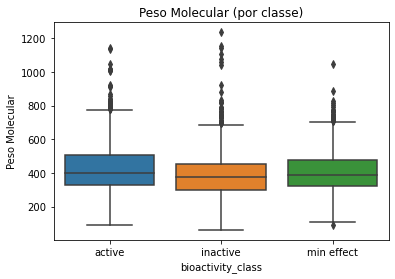

In [15]:
## Obter gráficos dos descritores para mostrar as diferenças entre as classes (ativa, inativa, efeito mínimo)
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um gráfico de caixa (boxplot) para comparar o descritor 'Molecular Weight' entre as classes
sns.boxplot(x='bioactivity_class', y='Peso Molecular', data=df_full)

# Título do gráfico
plt.title('Peso Molecular (por classe)')

# Salva o gráfico como um arquivo de imagem
plt.savefig('./img/Distribuição do Peso Molecular.png')

In [16]:
# Agrupar os dados por classe e calcular as estatísticas resumidas para 'Peso Molecular'
summary_stats = df_full.groupby('bioactivity_class')['Peso Molecular'].describe()

# Exibir as estatísticas resumidas em forma de texto
print(summary_stats)

                    count        mean         std     min      25%       50%  \
bioactivity_class                                                              
active             3507.0  418.951544  138.661363  92.141  326.462  398.4780   
inactive           2186.0  383.447100  125.277223  61.040  296.154  375.4480   
min effect         1790.0  403.500802  123.218074  92.141  323.396  389.5175   

                         75%       max  
bioactivity_class                       
active             506.62300  1139.439  
inactive           454.34300  1235.463  
min effect         475.91975  1046.066  


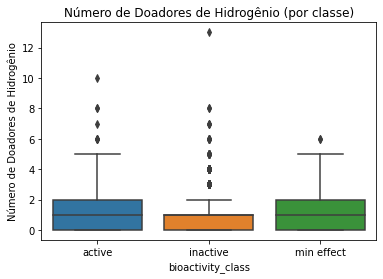

In [17]:
## Obter gráficos dos descritores para mostrar diferenças entre as classes (ativa, inativa, efeito mínimo)
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um gráfico de caixa (boxplot) para comparar o descritor 'Number of Hydrogen Donors' entre as classes
sns.boxplot(x='bioactivity_class', y='Número de Doadores de Hidrogênio', data=df_full)

# Define o título do gráfico
plt.title('Número de Doadores de Hidrogênio (por classe)')

# Salva o gráfico como um arquivo de imagem
plt.savefig('./img/Distribuição do Número de Doadores de Hidrogênio.png')

In [18]:
# Agrupar os dados por classe e calcular as estatísticas resumidas para 'Peso Molecular'
summary_stats = df_full.groupby('bioactivity_class')['Número de Doadores de Hidrogênio'].describe()

# Exibir as estatísticas resumidas em forma de texto
print(summary_stats)

                    count      mean       std  min  25%  50%  75%   max
bioactivity_class                                                      
active             3507.0  1.146279  1.093459  0.0  0.0  1.0  2.0  10.0
inactive           2186.0  0.977585  1.110363  0.0  0.0  1.0  1.0  13.0
min effect         1790.0  1.087709  1.003412  0.0  0.0  1.0  2.0   6.0


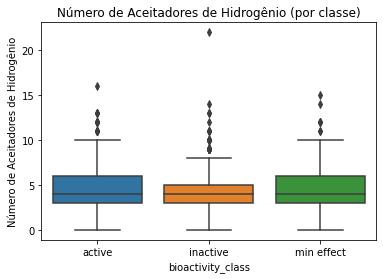

In [19]:
## Obter gráficos dos descritores para mostrar diferenças entre as classes (ativa, inativa, efeito mínimo)
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um gráfico de caixa (boxplot) para comparar o descritor 'Number of Hydrogen Acceptors' entre as classes
sns.boxplot(x='bioactivity_class', y='Número de Aceitadores de Hidrogênio', data=df_full)

# Define o título do gráfico
plt.title('Número de Aceitadores de Hidrogênio (por classe)')

# Salva o gráfico como um arquivo de imagem
plt.savefig('./img/Distribuição do Número de Aceitadores de Hidrogênio.png')


In [20]:
# Agrupar os dados por classe e calcular as estatísticas resumidas para 'Peso Molecular'
summary_stats = df_full.groupby('bioactivity_class')['Número de Aceitadores de Hidrogênio'].describe()

# Exibir as estatísticas resumidas em forma de texto
print(summary_stats)

                    count      mean       std  min  25%  50%  75%   max
bioactivity_class                                                      
active             3507.0  4.424865  1.963366  0.0  3.0  4.0  6.0  16.0
inactive           2186.0  4.262580  1.928621  0.0  3.0  4.0  5.0  22.0
min effect         1790.0  4.325140  1.982141  0.0  3.0  4.0  6.0  15.0


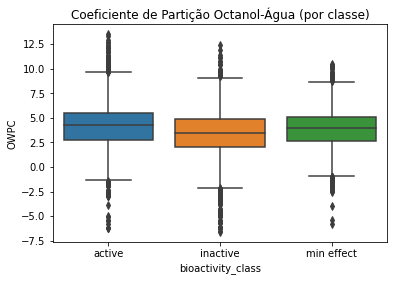

In [21]:
## Obter gráficos dos descritores para mostrar diferenças entre as classes (ativa, inativa, efeito mínimo)
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um gráfico de caixa (boxplot) para comparar o descritor 'OWPC' entre as classes
sns.boxplot(x='bioactivity_class', y='OWPC', data=df_full)

# Define o título do gráfico
plt.title('Coeficiente de Partição Octanol-Água (por classe)')

# Salva o gráfico como um arquivo de imagem
plt.savefig('./img/Distribuição do Coeficiente de Partição Octanol-Água.png')

In [22]:
# Agrupar os dados por classe e calcular as estatísticas resumidas para 'Peso Molecular'
summary_stats = df_full.groupby('bioactivity_class')['OWPC'].describe()

# Exibir as estatísticas resumidas em forma de texto
print(summary_stats)

                    count      mean       std     min     25%     50%  \
bioactivity_class                                                       
active             3507.0  4.334624  2.272715 -6.2332  2.7711  4.2872   
inactive           2186.0  3.325658  2.534944 -6.6151  2.0833  3.4326   
min effect         1790.0  3.886949  2.100345 -5.7526  2.6958  3.9499   

                        75%      max  
bioactivity_class                     
active             5.515000  13.5068  
inactive           4.922925  12.4336  
min effect         5.100200  10.4464  


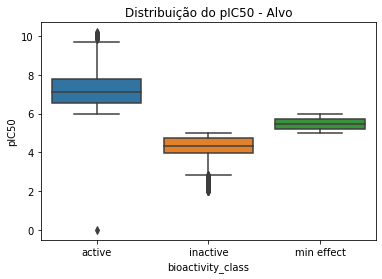

In [23]:
## Obter gráficos dos descritores para mostrar diferenças entre as classes (ativa, inativa, efeito mínimo)
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um gráfico de caixa (boxplot) para comparar o descritor 'pIC50' entre as classes
sns.boxplot(x='bioactivity_class', y='pIC50', data=df_full)

# Define o título do gráfico
plt.title('Distribuição do pIC50 - Alvo')

# Salva o gráfico como um arquivo de imagem
plt.savefig('./img/Distribuição do pIC50 por classe.png')

In [24]:
# Agrupar os dados por classe e calcular as estatísticas resumidas para 'Peso Molecular'
summary_stats = df_full.groupby('bioactivity_class')['pIC50'].describe()

# Exibir as estatísticas resumidas em forma de texto
print(summary_stats)

                    count      mean       std       min       25%       50%  \
bioactivity_class                                                             
active             3507.0  7.240588  0.885656 -0.000000  6.522879  7.089376   
inactive           2186.0  4.223867  0.666427  2.000000  3.978811  4.346787   
min effect         1790.0  5.480983  0.290730  5.000869  5.228596  5.470000   

                        75%        max  
bioactivity_class                       
active             7.800382  10.187087  
inactive           4.752395   5.000000  
min effect         5.721811   6.000000  


In [25]:
## Remover compostos que violam mais de uma das Regras de Lipinski:
## . Peso Molecular < 500 daltons
## . Coeficiente de Partição Octanol-Água (logP) < 5
## . Número de doadores de hidrogênio < 5
## . Número de aceitadores de hidrogênio < 10

def lipinski_checker(data):
          
    num_hdonors = data['Número de Doadores de Hidrogênio']
    num_hacceptors = data['Número de Aceitadores de Hidrogênio']
    mol_weight = data['Peso Molecular']
    mol_logp = data['OWPC']
    
    result = []
    
    if num_hdonors > 5:
        result.append(1)  # Adiciona 1 se a regra for violada
    else:
        result.append(0)  # Adiciona 0 se a regra não for violada
        
    if num_hacceptors > 10:
        result.append(1)  # Adiciona 1 se a regra for violada
    else:
        result.append(0)  # Adiciona 0 se a regra não for violada
        
    if mol_weight >= 500:
        result.append(1)  # Adiciona 1 se a regra for violada
    else:
        result.append(0)  # Adiciona 0 se a regra não for violada
        
    if mol_logp >= 5:
        result.append(1)  # Adiciona 1 se a regra for violada
    else:
        result.append(0)  # Adiciona 0 se a regra não for violada
    
    return result
    
def lipinski_pass(compounds):
    checked_df = {'HD':[], 'HA':[], 'logP':[], 'MW':[], 'lit':[]}  # Dicionário para armazenar resultados
    numTrials = len(compounds)
    for x in range(numTrials):
        result = lipinski_checker(compounds.iloc[x])  # Avalia se as regras de Lipinski são cumpridas para o composto
        checked_df['HD'].append(result[0])  # Armazena o resultado da primeira regra
        checked_df['HA'].append(result[1])  # Armazena o resultado da segunda regra
        checked_df['logP'].append(result[2])  # Armazena o resultado da terceira regra
        checked_df['MW'].append(result[3])  # Armazena o resultado da quarta regra
        checked_df['lit'].append(compounds['lit'])  # Armazena a referência do composto
    return checked_df

In [26]:
# Aplica a função lipinski_pass ao DataFrame df_full para obter os resultados das regras de Lipinski
checked_df = lipinski_pass(df_full)

# Cria um novo DataFrame a partir dos resultados das regras de Lipinski
checked_df = pd.DataFrame(checked_df)

checked_df

,HD,HA,logP,MW,lit
0,0,0,0,0,0 1 1 2 2 3 3 ...
1,0,0,0,0,0 1 1 2 2 3 3 ...
2,0,0,0,1,0 1 1 2 2 3 3 ...
3,0,0,0,0,0 1 1 2 2 3 3 ...
4,0,0,0,0,0 1 1 2 2 3 3 ...
...,...,...,...,...,...
7478,0,0,0,1,0 1 1 2 2 3 3 ...
7479,0,0,0,0,0 1 1 2 2 3 3 ...
7480,0,0,0,0,0 1 1 2 2 3 3 ...
7481,0,0,0,0,0 1 1 2 2 3 3 ...


In [27]:
# 'sum' representa o número de regras de Lipinski violadas para cada composto, já que as colunas em 
# columns_to_sum representam as regras individuais e a soma dessas colunas dará o total de regras violadas 
# para cada composto.

# Lista das colunas a serem somadas
columns_to_sum = ['HD', 'HA', 'logP', 'MW']

# Cria uma nova coluna 'sum' que é a soma das colunas especificadas
checked_df['sum'] = checked_df[columns_to_sum].sum(axis=1)
checked_df

,HD,HA,logP,MW,lit,sum
0,0,0,0,0,0 1 1 2 2 3 3 ...,0
1,0,0,0,0,0 1 1 2 2 3 3 ...,0
2,0,0,0,1,0 1 1 2 2 3 3 ...,1
3,0,0,0,0,0 1 1 2 2 3 3 ...,0
4,0,0,0,0,0 1 1 2 2 3 3 ...,0
...,...,...,...,...,...,...
7478,0,0,0,1,0 1 1 2 2 3 3 ...,1
7479,0,0,0,0,0 1 1 2 2 3 3 ...,0
7480,0,0,0,0,0 1 1 2 2 3 3 ...,0
7481,0,0,0,0,0 1 1 2 2 3 3 ...,0


In [28]:
# Filtra o DataFrame checked_df para manter apenas as linhas onde a soma é menor ou igual a 1
checked_df = checked_df.loc[checked_df['sum'] <= 1]

# Adiciona os índices das linhas como valores na coluna 'lit'
checked_df['lit'] = checked_df.index

# Adiciona os índices das linhas do DataFrame df_full como valores na coluna 'lit'
df_full['lit'] = df_full.index 

# Combina (faz merge) os DataFrames checked_df e df_full com base na coluna 'lit'
checked_df = pd.merge(checked_df, df_full, on='lit')

checked_df

/home/note/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,HD,HA,logP,MW,lit,sum,Unnamed: 0,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,pIC50
0,0,0,0,0,0,0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,6.124939
1,0,0,0,0,1,0,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,7.000000
2,0,0,0,1,2,1,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,4.301030
3,0,0,0,0,3,0,3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,0.0,5.0,4.7069,6.522879
4,0,0,0,0,4,0,4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,0.0,6.0,3.0953,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6380,0,0,0,1,7478,1,7542,active,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,352.478,1.0,3.0,5.0610,9.679854
6381,0,0,0,0,7479,0,7543,inactive,CHEMBL147527,C#CCN(C)C(C)Cc1cccc(OC(=O)N(C)CC)c1,287.246,1.0,4.0,2.1994,3.630784
6382,0,0,0,0,7480,0,7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,311.337,1.0,4.0,3.1837,6.562249
6383,0,0,0,0,7481,0,7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,198.269,1.0,2.0,2.6958,4.118045


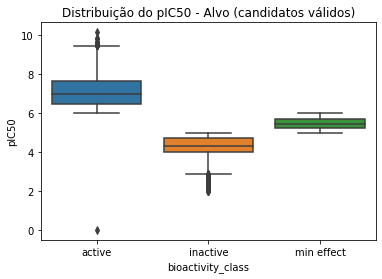

In [29]:
# Cria um gráfico de caixa (boxplot) para comparar o descritor 'pIC50' entre as classes do DataFrame checked_df
sns.boxplot(x='bioactivity_class', y='pIC50', data=checked_df)

# Define o título do gráfico
plt.title('Distribuição do pIC50 - Alvo (candidatos válidos)')

# Salva o gráfico como um arquivo de imagem
plt.savefig('./img/Distribuição do pIC50 por classe (candidatos Lipinski) ')

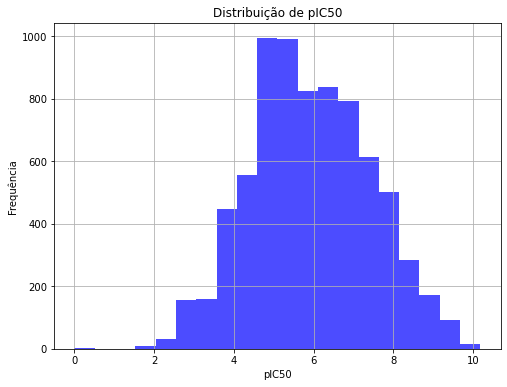

In [31]:
import matplotlib.pyplot as plt

# Plotar um gráfico de distribuição dos valores da coluna 'pIC50'
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.hist(df_full['pIC50'], bins=20, color='blue', alpha=0.7)
plt.title('Distribuição de pIC50')
plt.xlabel('pIC50')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [30]:
# Agrupar os dados por classe e calcular as estatísticas resumidas para 'Peso Molecular'
summary_stats = df_full.groupby('bioactivity_class')['pIC50'].describe()

# Exibir as estatísticas resumidas em forma de texto
print(summary_stats)

                    count      mean       std       min       25%       50%  \
bioactivity_class                                                             
active             3507.0  7.240588  0.885656 -0.000000  6.522879  7.089376   
inactive           2186.0  4.223867  0.666427  2.000000  3.978811  4.346787   
min effect         1790.0  5.480983  0.290730  5.000869  5.228596  5.470000   

                        75%        max  
bioactivity_class                       
active             7.800382  10.187087  
inactive           4.752395   5.000000  
min effect         5.721811   6.000000  


In [39]:
# Filtra os compostos válidos para classificação, removendo aqueles com classe 'min effect'
valid_compounds_classification = checked_df[checked_df.bioactivity_class != 'min effect']

# Salva os dados dos compostos válidos para classificação em um arquivo CSV
valid_compounds_classification.to_csv('./formats/df_ready_classification.csv')

# Salva todos os dados preparados para regressão em um arquivo CSV
checked_df.to_csv('./formats/df-ready-regression.csv')

In [40]:
### Agora os dados estão preparados para engenharia de características: obtenção de descritores 1D/2D para a biblioteca de compostos.

# Lê os arquivos CSV criados anteriormente
data_1 = pd.read_csv('./screened/df-ready-regression.csv')
data_2 = pd.read_csv('./screened/df_ready_classification.csv')

selections = ['canonical_smiles', 'molecule_chembl_id']

# Seleciona as colunas 'canonical_smiles' e 'molecule_chembl_id' do DataFrame data_1
df_reg = data_1[selections]

# Seleciona as mesmas colunas do DataFrame data_2
df_class = data_2[selections]

# Salva as seleções em arquivos separados por tabulação
df_reg.to_csv('./formats/Padel_regression_ready.smi', sep='\t', index=False, header=False)
df_class.to_csv('./formats/Padel_classification_ready.smi', sep='\t', index=False, header=False)

In [41]:
data_1

,Unnamed: 0,HD,HA,logP,MW,lit,sum,Unnamed: 0.1,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,pIC50
0,0,0,0,0,0,0,0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,6.124939
1,1,0,0,0,0,1,0,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,7.000000
2,2,0,0,0,1,2,1,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,4.301030
3,3,0,0,0,0,3,0,3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,0.0,5.0,4.7069,6.522879
4,4,0,0,0,0,4,0,4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,0.0,6.0,3.0953,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6380,6380,0,0,0,1,7478,1,7542,active,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,352.478,1.0,3.0,5.0610,9.679854
6381,6381,0,0,0,0,7479,0,7543,inactive,CHEMBL147527,C#CCN(C)C(C)Cc1cccc(OC(=O)N(C)CC)c1,287.246,1.0,4.0,2.1994,3.630784
6382,6382,0,0,0,0,7480,0,7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,311.337,1.0,4.0,3.1837,6.562249
6383,6383,0,0,0,0,7481,0,7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,198.269,1.0,2.0,2.6958,4.118045


In [42]:
data_2

,Unnamed: 0,HD,HA,logP,MW,lit,sum,Unnamed: 0.1,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,pIC50
0,0,0,0,0,0,0,0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,6.124939
1,1,0,0,0,0,1,0,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,7.000000
2,2,0,0,0,1,2,1,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,4.301030
3,3,0,0,0,0,3,0,3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,0.0,5.0,4.7069,6.522879
4,4,0,0,0,0,4,0,4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,0.0,6.0,3.0953,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,6380,0,0,0,1,7478,1,7542,active,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,352.478,1.0,3.0,5.0610,9.679854
4825,6381,0,0,0,0,7479,0,7543,inactive,CHEMBL147527,C#CCN(C)C(C)Cc1cccc(OC(=O)N(C)CC)c1,287.246,1.0,4.0,2.1994,3.630784
4826,6382,0,0,0,0,7480,0,7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,311.337,1.0,4.0,3.1837,6.562249
4827,6383,0,0,0,0,7481,0,7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,198.269,1.0,2.0,2.6958,4.118045


In [ ]:
import pandas as pd
from padelpy import from_smiles
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import DataStructs
from padelpy import from_smiles, from_mdl, from_sdf

import numpy as np
import seaborn as sns
import matplotlib
pd.__version__

In [ ]:
mol = [Chem.MolFromSmiles(smi) for smi in data_1['canonical_smiles'].array.shift().dropna()]

with open("mol.mdl", "w") as output:
    output.write(str(mol))

In [ ]:
datafile.dtypes

In [ ]:
#exibe o valor atual
cols = list(datafile.columns.values)
cols

In [ ]:
datafile.head(3)

In [ ]:
PandasTools.WriteSDF(datafile, './formats/df_ready_classification.sdf', molColName='Molecule', properties=list(datafile.columns))